# NewsPaper Image theme identification

### 0. Import pytorch and device agnostic code

In [1]:
import torch
from torch import nn
print(torch.__version__)

2.6.0


In [2]:
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [3]:
print(torch.backends.mps.is_available())

True


In [4]:
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
device

device(type='mps')

## 1.Data Preparation and Data Exploration 

In [5]:
# Setting up dataset directory
from pathlib import Path
dir_path="/Users/dheekshitrapeti/Downloads/Newspaper_image_categorization"
dir_path=Path(dir_path)
dir_path

PosixPath('/Users/dheekshitrapeti/Downloads/Newspaper_image_categorization')

In [6]:
import os
from pathlib import Path
def walk_through_dir(dir_path):
    """Walk through the directory returning its content"""
    for dirpath,dirnames,filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")
        
walk_through_dir(dir_path)

There are 4 directories and 7 images in /Users/dheekshitrapeti/Downloads/Newspaper_image_categorization
There are 5 directories and 1 images in /Users/dheekshitrapeti/Downloads/Newspaper_image_categorization/test
There are 0 directories and 101 images in /Users/dheekshitrapeti/Downloads/Newspaper_image_categorization/test/Political
There are 0 directories and 16 images in /Users/dheekshitrapeti/Downloads/Newspaper_image_categorization/test/film
There are 0 directories and 17 images in /Users/dheekshitrapeti/Downloads/Newspaper_image_categorization/test/Business
There are 0 directories and 124 images in /Users/dheekshitrapeti/Downloads/Newspaper_image_categorization/test/Sports
There are 0 directories and 10 images in /Users/dheekshitrapeti/Downloads/Newspaper_image_categorization/test/weather
There are 0 directories and 1 images in /Users/dheekshitrapeti/Downloads/Newspaper_image_categorization/__pycache__
There are 5 directories and 1 images in /Users/dheekshitrapeti/Downloads/Newspap

## 2. Visualizing a image

Random image path: /Users/dheekshitrapeti/Downloads/Newspaper_image_categorization/train/Political/IMG_7854.jpeg
Iamge class:Political
Image height :1634
Iamge width: 1774


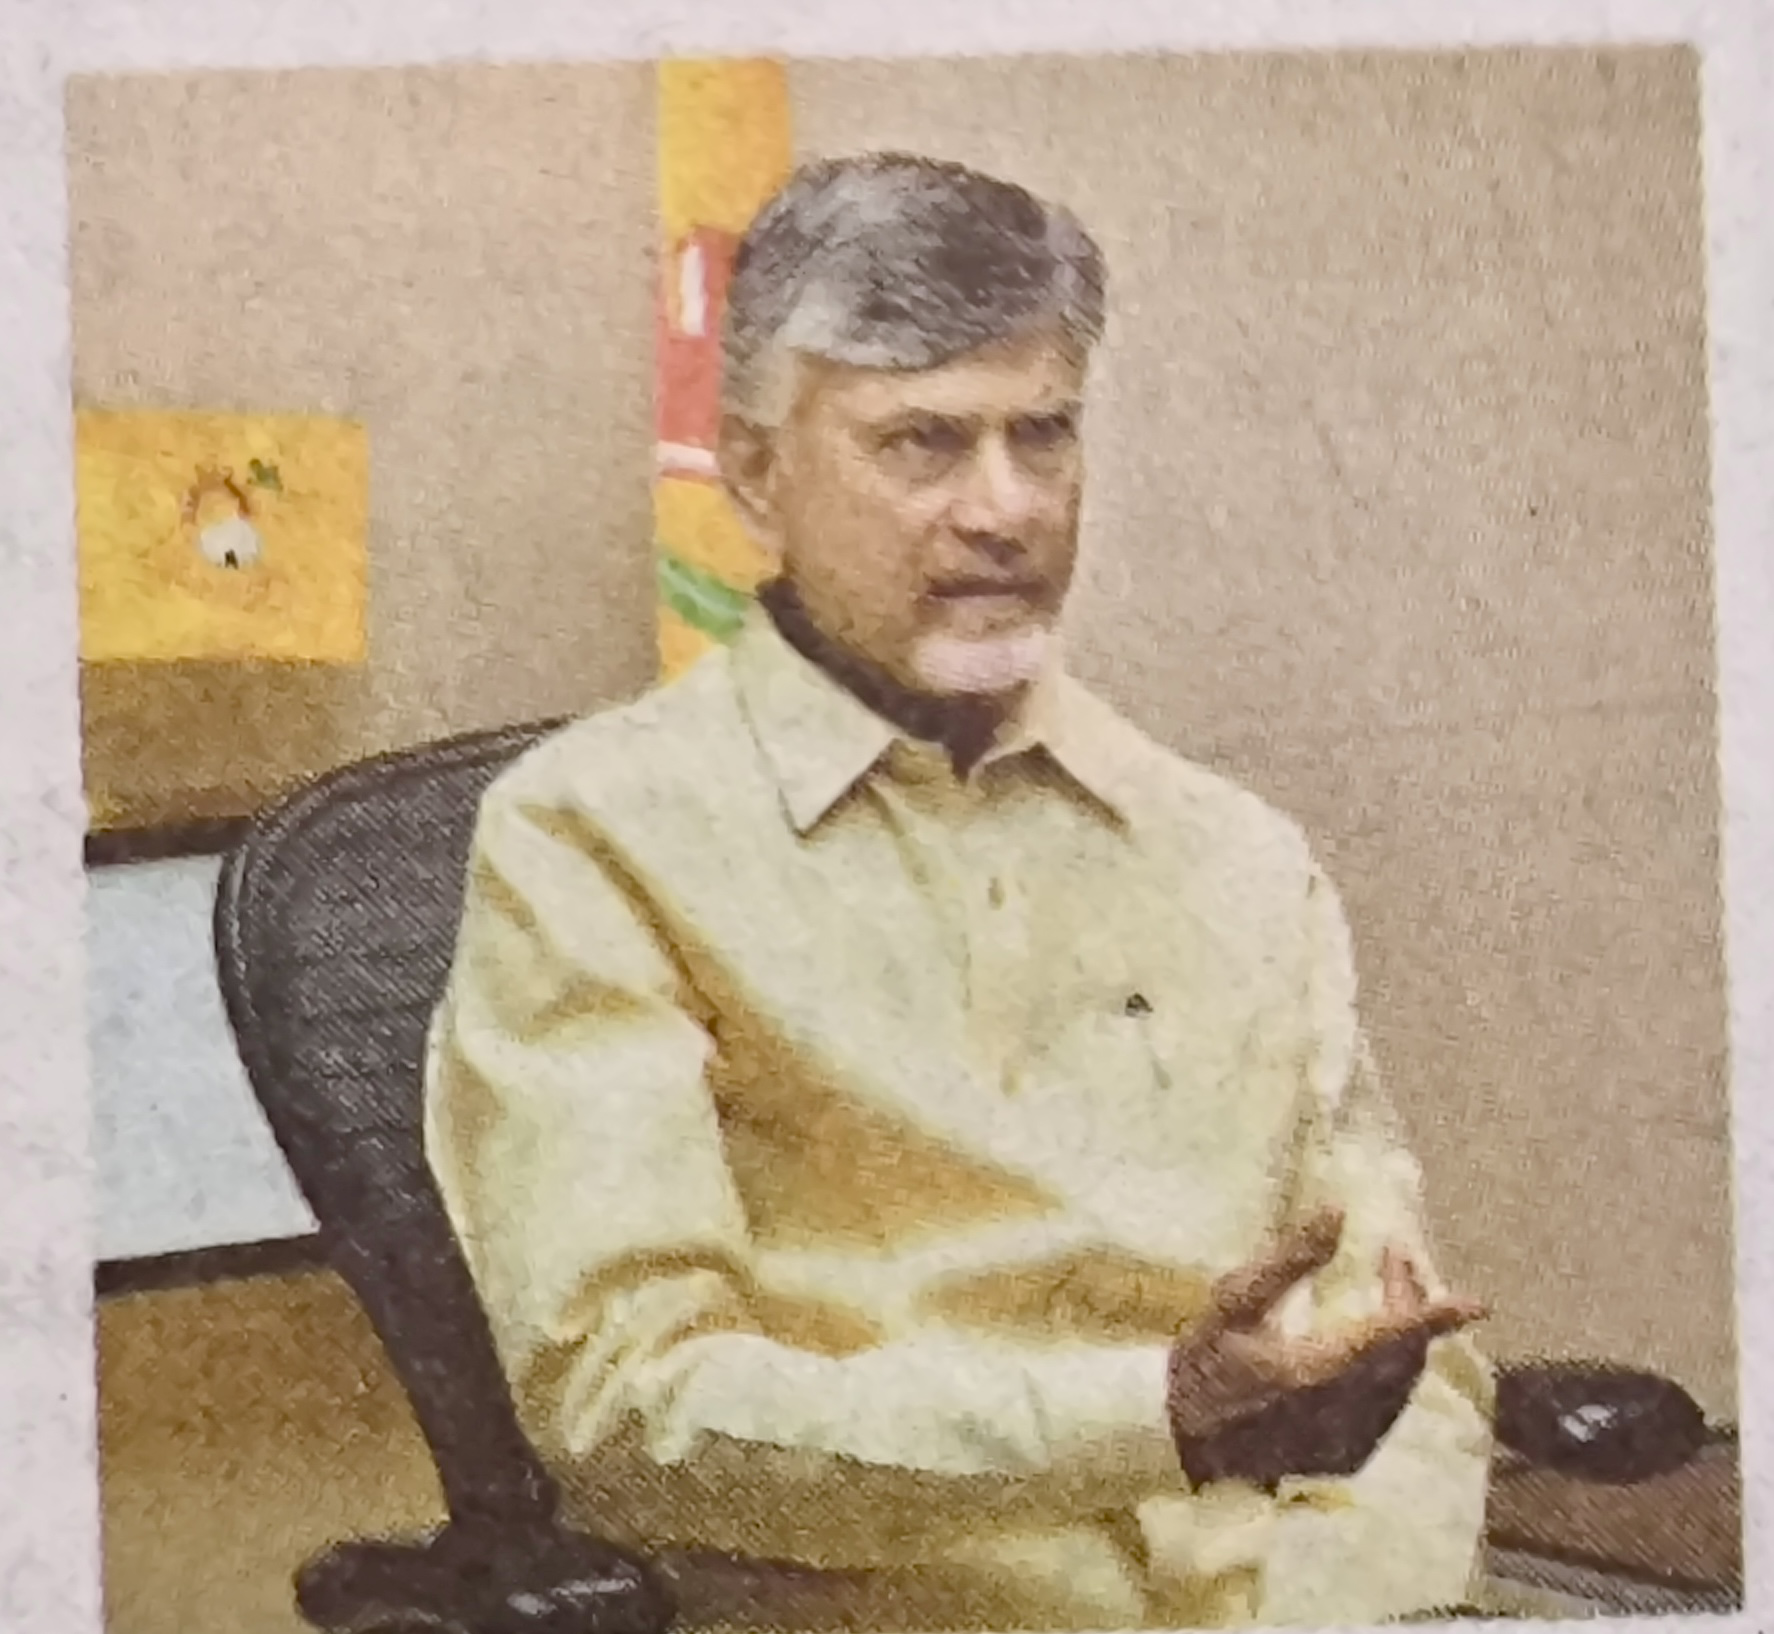

In [7]:
import random
from PIL import Image
image_path_list=list(dir_path.glob("*/*/*.jpeg"))
random_image_path=random.choice(image_path_list)
image_class=random_image_path.parent.stem
img=Image.open(random_image_path)

# Print metadata
print(f"Random image path: {random_image_path}")
print(f"Iamge class:{image_class}")
print(f"Image height :{img.height}")
print(f"Iamge width: {img.width}")
img


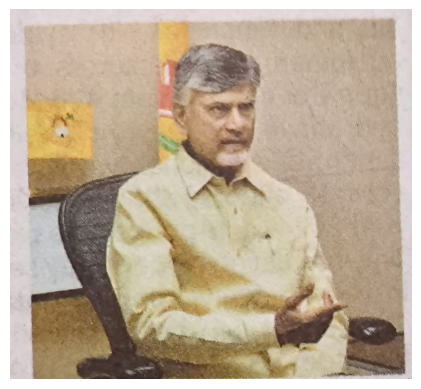

In [8]:
# Try to visualize and image with matplotlib......
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.imshow(mpimg.imread(random_image_path))
plt.axis(False);

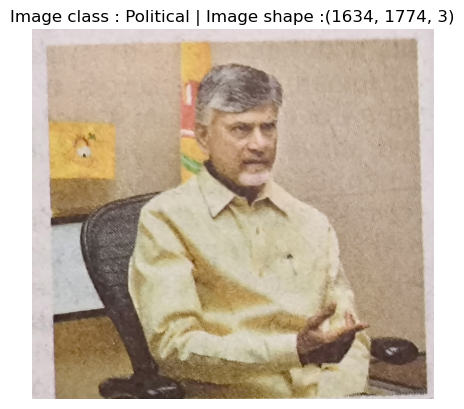

In [9]:
import numpy as np
# Trun the image into numpy array
img_as_array=np.asarray(img)
# print(img_as_array)
# Plot the imag eusing matplotlib
plt.imshow(img_as_array)
plt.title(f"Image class : {image_class} | Image shape :{img_as_array.shape}")
plt.axis(False);

## 3.Transforming data

In [10]:
from torch.utils.data import dataloader
from torchvision import datasets,transforms

### 3.1 Transforming data using torchvision.transform

In [11]:
# Creating a instance of transform to convert and resize the images

data_transform = transforms.Compose([
    transforms.RandomRotation(30),
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor()  # This already scales pixel values to [0,1]
])

In [12]:
# Displaying the results of transform on single image
random_image_path=random.choice(image_path_list)
image_class=random_image_path.parent.stem
img=Image.open(random_image_path)
data_transform(img)

tensor([[[0.0000, 0.0000, 0.0000,  ..., 0.8196, 0.8157, 0.8157],
         [0.0000, 0.0000, 0.0000,  ..., 0.8196, 0.8196, 0.8157],
         [0.0000, 0.0000, 0.0000,  ..., 0.8196, 0.8196, 0.8157],
         ...,
         [0.7725, 0.7373, 0.6941,  ..., 0.0000, 0.0000, 0.0000],
         [0.7294, 0.6902, 0.6627,  ..., 0.0000, 0.0000, 0.0000],
         [0.7412, 0.7412, 0.7059,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.7922, 0.7882, 0.7882],
         [0.0000, 0.0000, 0.0000,  ..., 0.7922, 0.7922, 0.7882],
         [0.0000, 0.0000, 0.0000,  ..., 0.7961, 0.7961, 0.7922],
         ...,
         [0.5255, 0.4941, 0.4471,  ..., 0.0000, 0.0000, 0.0000],
         [0.4863, 0.4471, 0.4157,  ..., 0.0000, 0.0000, 0.0000],
         [0.5216, 0.5255, 0.4941,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.7686, 0.7647, 0.7647],
         [0.0000, 0.0000, 0.0000,  ..., 0.7686, 0.7686, 0.7647],
         [0.0000, 0.0000, 0.0000,  ..., 0.7725, 0.7725, 0.

In [13]:
# Dispalying the shape of the transformed image
data_transform(img).shape

torch.Size([3, 224, 224])

### 3.2 Visualizing the images before and after transforming

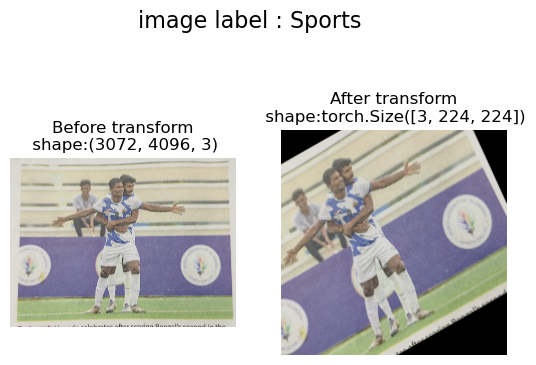

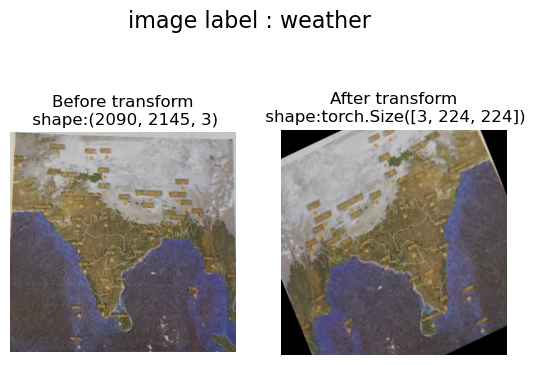

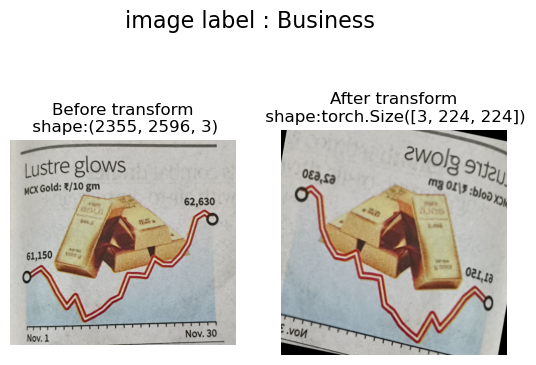

In [14]:
import matplotlib.pyplot as plt
def plot_transform_images(image_paths,transform,n=3,seed=42):
    for i in range(n):
        random_image=random.choice(image_paths)
        random_image_class=random_image.parent.stem
        fig,ax=plt.subplots(nrows=1,ncols=2)
        fig.suptitle(f"image label : {random_image_class}",fontsize=16)
        ax[0].imshow(mpimg.imread(random_image))
        ax[0].set_title(f"Before transform\n shape:{mpimg.imread(random_image).shape}")
        ax[0].axis(False);
        tran_random_image=Image.open(random_image)
        transformed_random_image=transform(tran_random_image)
        ax[1].imshow(transformed_random_image.permute(1, 2, 0))
        ax[1].set_title(f"After transform\n shape:{transformed_random_image.shape}")
        ax[1].axis(False);

plot_transform_images(image_path_list,data_transform)

## 4. Loading image data using ImageFolder

In [15]:
dir_path/"train",dir_path/"test"

(PosixPath('/Users/dheekshitrapeti/Downloads/Newspaper_image_categorization/train'),
 PosixPath('/Users/dheekshitrapeti/Downloads/Newspaper_image_categorization/test'))

In [16]:
train_dir=dir_path/ "train"
test_dir=dir_path/ "test"
train_data=datasets.ImageFolder(
    root=train_dir,
    transform=data_transform,
    target_transform=None
)
test_data=datasets.ImageFolder(
    root=test_dir,
    transform=data_transform,
)
train_data,test_data

(Dataset ImageFolder
     Number of datapoints: 1143
     Root location: /Users/dheekshitrapeti/Downloads/Newspaper_image_categorization/train
     StandardTransform
 Transform: Compose(
                RandomRotation(degrees=[-30.0, 30.0], interpolation=nearest, expand=False, fill=0)
                RandomResizedCrop(size=(224, 224), scale=(0.8, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 267
     Root location: /Users/dheekshitrapeti/Downloads/Newspaper_image_categorization/test
     StandardTransform
 Transform: Compose(
                RandomRotation(degrees=[-30.0, 30.0], interpolation=nearest, expand=False, fill=0)
                RandomResizedCrop(size=(224, 224), scale=(0.8, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
           

In [17]:
# Get class name as list
class_names=train_data.classes
class_names

['Business', 'Political', 'Sports', 'film', 'weather']

In [18]:
# Get class names as dictionary
class_idx_name=train_data.class_to_idx
class_idx_name

{'Business': 0, 'Political': 1, 'Sports': 2, 'film': 3, 'weather': 4}

In [19]:
# Printing the length of train datasets
len(train_data),len(test_data)

(1143, 267)

In [20]:
train_data.samples[0]

('/Users/dheekshitrapeti/Downloads/Newspaper_image_categorization/train/Business/IMG_20250308_214528 copy 2.jpg',
 0)

In [21]:
# Get info from the sample
img,label=train_data[0][0],train_data[0][1]
print(f"Image tensor:\n{img}")
print(f"Image shape:{img.shape}")
print(f"Image datatype:{img.dtype}")
print(f"Image label:{label}")
print(f"Label datatype:{type(label)}")

Image tensor:
tensor([[[0.0000, 0.0000, 0.0000,  ..., 0.5333, 0.0157, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.6627, 0.0706, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.7569, 0.1804, 0.0000],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.5216, 0.0157, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.6471, 0.0667, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.7373, 0.1765, 0.0000],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.5137, 0.0157, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.6392, 0.0667, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.72

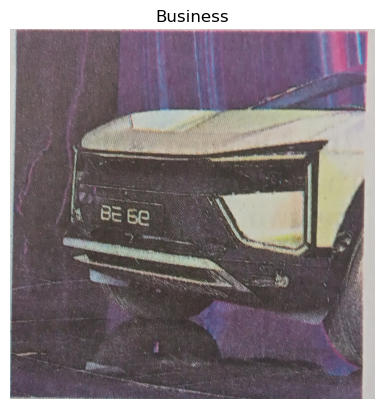

In [22]:
# Index on the train_dataset to get single image and label
plt.imshow(mpimg.imread(train_data.samples[0][0]))
plt.title(class_names[train_data.samples[0][1]])
plt.axis(False);

## 5. Turning our image dataset into Pytorch DataLoaders

In [23]:
from torch.utils.data import DataLoader

In [24]:
train_data_loader=DataLoader(
    dataset=train_data,
    batch_size=32,
    num_workers=os.cpu_count(),
    shuffle=True
)
test_data_loader=DataLoader(
    dataset=test_data,
    batch_size=32,
    num_workers=os.cpu_count(),
    shuffle=False
)
train_data_loader,test_data_loader

(<torch.utils.data.dataloader.DataLoader at 0x17844bb00>,
 <torch.utils.data.dataloader.DataLoader at 0x177971ee0>)

In [25]:
len(train_data_loader),len(test_data_loader)

(36, 9)

In [26]:
len(train_data)/32,len(test_data)/32

(35.71875, 8.34375)

In [27]:
train_data_loader.batch_size,test_data_loader.batch_size

(32, 32)

In [28]:
img,label=next(iter(train_data_loader))

# Batch size will now be 32,you can change the batch size if you like
print(f"Image shape:{img.shape}------>[batch_size,color_channel,height,width]")
print(f"Label shape :{label.shape}")

Image shape:torch.Size([32, 3, 224, 224])------>[batch_size,color_channel,height,width]
Label shape :torch.Size([32])


## 6.Creating a function to display images randomly

In [29]:
from typing import Tuple,List,Dict

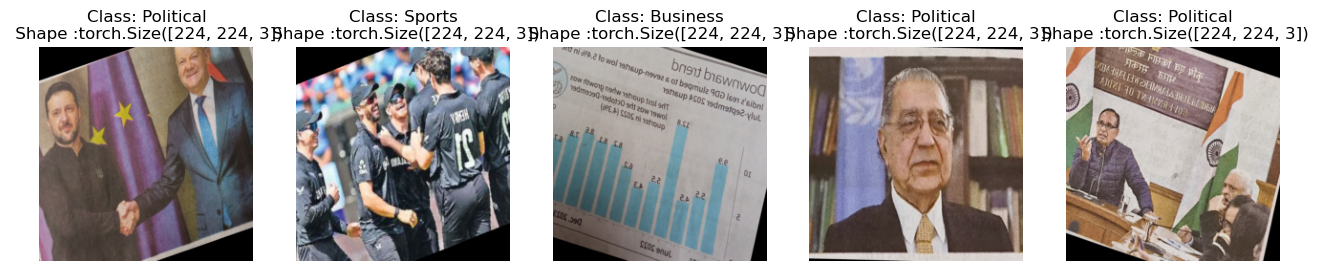

In [30]:
# 1.Create a function to take in dataset
def display_random_images(dataset:torch.utils.data.Dataset,
                         classes:List[str]=None,
                         n:int = 10,
                         display_shape:bool=True,
                         seed:int=None):

    # 2. Adjust display if n is too high
    if n>10:
        n=10
        display_shape=False
        print(f"For display purposes , n shouldn't be larger than 10,setting to 10 and removing shape display.")
    # Set the random seed
    if seed:
        random.seed(seed)
    # 4. Get random sample indexes
    random_samples_idx=random.sample(range(len(dataset)),k=n)
    # 5. Setup plot
    plt.figure(figsize=(16,8))
    
    # 6. Loop through the random indexs and plot them with matplotlib 
    for i ,targ_sample in enumerate(random_samples_idx):
        targ_image,target_label=dataset[targ_sample][0],dataset[targ_sample][1]
        # Adjust tensor dimensions for plotting
        targ_image_adjust=targ_image.permute(1,2,0)
        plt.subplot(1,n,i+1)
        plt.imshow(targ_image_adjust)
        plt.axis(False)
        if classes:
            title= f"Class: {classes[target_label]}"
            if display_shape:
                title=title+f"\n Shape :{targ_image_adjust.shape}"
        plt.title(title)

display_random_images(test_data,n=5,classes=class_names,seed=None)

In [31]:
# Check out what's inside the training dataloader
train_features_batch,train_labels_batch=next(iter(train_data_loader))
train_features_batch.shape,train_labels_batch.shape

(torch.Size([32, 3, 224, 224]), torch.Size([32]))

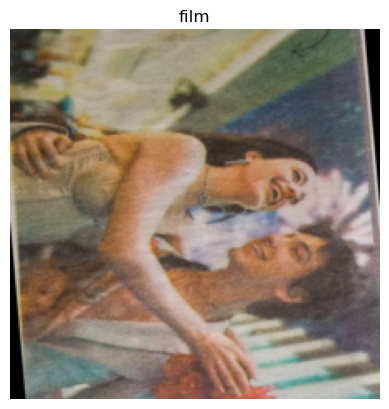

In [32]:
# Show a sample
# torch.manual_seed(42)
random_idx=torch.randint(0,len(train_features_batch),size=[1]).item()
img,label=train_features_batch[random_idx],train_labels_batch[random_idx]
plt.imshow(img.permute(1,2,0))
plt.title(class_names[label])
plt.axis("off");

## 7. Creating a Base line model to train on our data

In [33]:
# Create a flatten layer
flatten_layer = nn.Flatten()

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output=flatten_layer(x)

# Print the output
print(x.shape)
print(output.shape)

torch.Size([3, 224, 224])
torch.Size([3, 50176])


In [34]:
from torch import nn
class BaseLineModel(nn.Module):
    def __init__(self,input_layers:int,hidden_layers:int,output_layer:int):
        super().__init__()
        self.layers=nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_layers,out_features=hidden_layers),
            nn.ReLU(),
            nn.Linear(in_features=hidden_layers,out_features=hidden_layers),
            nn.ReLU(),
            nn.Linear(in_features=hidden_layers,out_features=hidden_layers),
            nn.ReLU(),
            nn.Linear(in_features=hidden_layers,out_features=output_layer)
        )
    def forward(self,x):
        return self.layers(x)

model_0=BaseLineModel(input_layers=224*224*3,hidden_layers=64,output_layer=len(class_names)).to(device)
model_0

BaseLineModel(
  (layers): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=150528, out_features=64, bias=True)
    (2): ReLU()
    (3): Linear(in_features=64, out_features=64, bias=True)
    (4): ReLU()
    (5): Linear(in_features=64, out_features=64, bias=True)
    (6): ReLU()
    (7): Linear(in_features=64, out_features=5, bias=True)
  )
)

In [35]:
model_0.state_dict()

OrderedDict([('layers.1.weight',
              tensor([[ 2.4518e-04,  1.5968e-03,  2.0433e-03,  ..., -1.5827e-04,
                       -2.2815e-03, -8.7322e-04],
                      [ 2.6710e-05,  6.4116e-04,  2.1699e-05,  ..., -6.2080e-04,
                       -1.2430e-03, -1.3470e-03],
                      [ 2.5570e-03,  1.7878e-03,  1.1326e-03,  ..., -8.5442e-05,
                        1.9747e-03, -2.5631e-03],
                      ...,
                      [-1.4736e-03,  1.8844e-03,  5.5757e-04,  ..., -1.5791e-03,
                        1.5185e-03,  1.3147e-03],
                      [ 2.1788e-03, -2.4454e-03, -7.6520e-04,  ..., -9.9456e-04,
                       -1.7794e-03,  1.3892e-03],
                      [ 1.6557e-03,  1.3904e-03, -2.4174e-03,  ...,  1.3765e-03,
                        4.0088e-04,  1.2893e-03]], device='mps:0')),
             ('layers.1.bias',
              tensor([-1.8652e-03,  1.9912e-03, -2.0325e-04,  1.0718e-03, -1.7752e-04,
                 

## 8. Setup Loss function, optimizer and accuracy metrics

In [36]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("Helper_functions.py already exists")
else:
  print("Downloading helper_functions.py")
  request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)

Helper_functions.py already exists


In [37]:
# Import accuracy metrics
from helper_functions import accuracy_fn

# Setup loss function as optimizer
loss_fn=nn.CrossEntropyLoss()

# Setup optimizer
optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.1)

## 8.1 Create a function to time our experiments

In [38]:
from timeit import default_timer as timer
def print_train_time(start:float,
                     end:float,
                     device:torch.device=None):
  '''
  Prints difference between start and end time
  '''
  total_time=end-start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

## 9. Creating a training loop using batches of data

In [ ]:
# Import tqdm for progress bar
from tqdm.auto import tqdm
# Set the see and start the time
torch.manual_seed(42)
start_time=timer()

# Set the number of epochs
epochs=10
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")
  # Training
  train_loss=0
  acc=0
  for batch,(x,y) in enumerate(train_data_loader):
    model_0.train()
    x=x.to(device)
    y=y.to(device)
    #Forward pass
    y_pred=model_0(x)

    #Calculate the loss
    loss=loss_fn(y_pred,y)
    train_loss+=loss

    #Optimizer zero grad
    optimizer.zero_grad()

    #Loss backward
    loss.backward()
    acc+=accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))

    #Optimizer step
    optimizer.step()

    if batch%4==0:
      print(f"Looked at {batch*len(x)}/{len(train_data)} samples")

  train_loss/=len(train_data_loader)
  acc/=len(train_data_loader)
  print(f"Train loss: {train_loss:.5f}| Accuracy: {acc:2f}")

  ### Testing
  test_loss,test_acc=0,0
  model_0.eval()
  with torch.inference_mode():
    for x,y in test_data_loader:
      x=x.to(device)
      y=y.to(device)
      test_pred=model_0(x)
      test_loss+=loss_fn(test_pred,y)
      test_acc+=accuracy_fn(y_true=y,y_pred=test_pred.argmax(dim=1))
    test_loss/=len(test_data_loader)
    test_acc/=len(test_data_loader)
  print(f"\nTest_loss:{test_loss:5f} | test_accuracy: {test_acc:2f}")

end_time=timer()
model_0_total_train_time=print_train_time(start=start_time,end=end_time,device="cpu")
model_0_total_train_time

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/1143 samples
Looked at 128/1143 samples
Looked at 256/1143 samples
Looked at 384/1143 samples
Looked at 512/1143 samples
Looked at 640/1143 samples
Looked at 768/1143 samples
Looked at 896/1143 samples
Looked at 1024/1143 samples


## 10. Make predictions and get model performance

In [ ]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module):
  loss,acc=0,0
  model.eval()
  with torch.inference_mode():
    for x,y in tqdm(data_loader):
      x=x.to(device)
      y=y.to(device)
      y_pred=model(x)
      loss+=loss_fn(y_pred,y)
      acc+=accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))
    loss/=len(data_loader)
    acc/=len(data_loader)

  return {"model_loss":loss.item(),
          "model_acc":acc,
          "model_name":model.__class__.__name__,
         }

model_0_results = eval_model(model=model_0,
                              data_loader=test_data_loader,
                              loss_fn=loss_fn)
model_0_results

## 11. Model 2 :Building a convolutional neural network model

In [ ]:
# Create a convolutional neural network
class CNNModelV2(nn.Module):
  '''
  Model architecture that replicates the TinyVGG model from CNN Explainer
  '''
  def __init__(self,input_shape:int,hidden_units:int,output_shape:int):
    super().__init__()
    self.conv_block_1=nn.Sequential(
        nn.Conv2d(in_channels=input_shape,out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,stride=2)
    )
    self.conv_block_2=nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,stride=2)
    )
    self.conv_block_3=nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,stride=2)
    )
    self.conv_block_4=nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,stride=2)
    )
    self.conv_block_5=nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,stride=2)
    )
    self.classifier=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,out_features=output_shape)
    )

  def forward(self,x):
    x=self.conv_block_1(x)
    # print(f"The output of conventional block1: {x.shape}")
    x=self.conv_block_2(x)
    x=self.conv_block_3(x)
    x=self.conv_block_4(x)
    x=self.conv_block_5(x)
      
    # print(f"The output of conventional bloack2: {x.shape}")
    x=self.classifier(x)
    # print(f"The output of Linear layer: {x.shape}")
    return x


In [ ]:
torch.manual_seed(42)
model_1=CNNModelV2(input_shape=3,hidden_units=32,output_shape=len(class_names)).to(device)
model_1

In [ ]:
1568/32

### 11.1 Training and Testing model_1 using our model

In [ ]:
# Import tqdm for progress bar
from tqdm.auto import tqdm
# Set the see and start the time
torch.manual_seed(42)
start_time=timer()

# Set the number of epochs
epochs=10
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")
  # Training
  train_loss=0
  acc=6
  for batch,(x,y) in enumerate(train_data_loader):
    x=x.to(device)
    y=y.to(device)
    model_1.train()

    #Forward pass
    y_pred=model_1(x)

    #Calculate the loss
    loss=loss_fn(y_pred,y)
    train_loss+=loss

    #Optimizer zero grad
    optimizer.zero_grad()

    #Loss backward
    loss.backward()
    acc+=accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))

    #Optimizer step
    optimizer.step()

    if batch%4==0:
      print(f"Looked at {batch*len(x)}/{len(train_data)} samples")

  train_loss/=len(train_data_loader)
  acc/=len(train_data_loader)
  print(f"Train loss: {train_loss:.5f}| Accuracy: {acc:2f}")

  ### Testing
  test_loss,test_acc=0,0
  model_1.eval()
  with torch.inference_mode():
    for x,y in test_data_loader:
      x=x.to(device)
      y=y.to(device)
      test_pred=model_1(x)
      test_loss+=loss_fn(test_pred,y)
      test_acc+=accuracy_fn(y_true=y,y_pred=test_pred.argmax(dim=1))
    test_loss/=len(test_data_loader)
    test_acc/=len(test_data_loader)
  print(f"\nTest_loss:{test_loss:5f} | test_accuracy: {test_acc:2f}")

end_time=timer()
model_2_total_train_time=print_train_time(start=start_time,end=end_time,device=device)
model_2_total_train_time

## 12. Improving our model accuracy with experiments

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class NewspaperCNN(nn.Module):
    def __init__(self, num_classes=5):
        super(NewspaperCNN, self).__init__()
        
        # Convolutional Layers
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1)
        
        # Pooling Layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Fully Connected Layers
        self.fc1 = nn.Linear(256 * 56 * 56, 512) 
        self.fc2 = nn.Linear(512, num_classes)
        
        # Dropout
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = self.pool(x)
        
        x = torch.flatten(x, start_dim=1)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)  # No softmax, as CrossEntropyLoss applies it
        return x

# Example usage
model_2 = NewspaperCNN(num_classes=len(class_names)).to(device)
print(model_2)

In [ ]:
# Setup loss function and optimizer
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(params=model_2.parameters(),lr=0.01)

In [ ]:
3136**(1/2)

### 12.1 Training and testing our model

In [ ]:
# Import tqdm for progress bar
from tqdm.auto import tqdm
# Set the see and start the time
torch.manual_seed(42)
start_time=timer()

# Set the number of epochs
epochs=10
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")
  # Training
  train_loss=0
  acc=0
  for batch,(x,y) in enumerate(train_data_loader):
    model_2.train()
    x=x.to(device)
    y=y.to(device)
    #Forward pass
    y_pred=model_2(x)

    #Calculate the loss
    loss=loss_fn(y_pred,y)
    train_loss+=loss

    #Optimizer zero grad
    optimizer.zero_grad()

    #Loss backward
    loss.backward()
    acc+=accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))

    #Optimizer step
    optimizer.step()

    if batch%4==0:
      print(f"Looked at {batch*len(x)}/{len(train_data)} samples")

  train_loss/=len(train_data_loader)
  acc/=len(train_data_loader)
  print(f"Train loss: {train_loss:.5f}| Accuracy: {acc:2f}")

  ### Testing
  test_loss,test_acc=0,0
  model_2.eval()
  with torch.inference_mode():
    for x,y in test_data_loader:
      x=x.to(device)
      y=y.to(device)
      test_pred=model_2(x)
      test_loss+=loss_fn(test_pred,y)
      test_acc+=accuracy_fn(y_true=y,y_pred=test_pred.argmax(dim=1))
    test_loss/=len(test_data_loader)
    test_acc/=len(test_data_loader)
  print(f"\nTest_loss:{test_loss:5f} | test_accuracy: {test_acc:2f}")

end_time=timer()
model_2_total_train_time=print_train_time(start=start_time,end=end_time,device=device)
model_2_total_train_time

## 13. Make and evaluate random predictions with our models

In [43]:
def make_predictions(model: torch.nn.Module,
                    data:list,
                    device: torch.device= device):
    pred_probs  = []
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for sample in data:
            sample=torch.unsqueeze(sample,dim=0).to(device)
            
            pred_logit=model(sample)
            
            pred_prob=torch.softmax(pred_logit.squeeze(),dim=0)
            
            pred_probs.append(pred_prob.cpu())
            
    return torch.stack(pred_probs)

In [ ]:
import random 
# torch.manual_seed(42)
test_sample=[]
test_label=[]
for sample ,label in random.sample(list(test_data),k=9):
    test_sample.append(sample)
    test_label.append(label)

test_sample[0].shape

In [ ]:
plt.imshow(test_sample[0].permute(1,2,0))
plt.title(class_names[test_label[0]])
plt.axis(False);

In [ ]:
# Make predictions
pred_probs=make_predictions(
    model=model_0,
    data=test_sample
)
pred_probs[:2]

In [ ]:
# Convert prediction probabilities to labels
pred_classes= pred_probs.argmax(dim=1)
pred_classes

In [ ]:
test_label

In [ ]:
plt.figure(figsize=(9,9))
nrows=3
ncols=3
for i,sample in enumerate(test_sample):
    plt.subplot(nrows,ncols,i+1)
    plt.imshow(sample.permute(1,2,0))
    pred_label=class_names[pred_classes[i]]
    truth_label=class_names[test_label[i]]
    title_text=f"Pred: {pred_label} | Truth: {truth_label}"
    if pred_label==truth_label:
        plt.title(title_text,fontsize=10,c="g")
    else:
        plt.title(title_text,fontsize=10,c="r")
    plt.axis(False)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models

class NewspaperCNN(nn.Module):
    def __init__(self, num_classes=5):
        super(NewspaperCNN, self).__init__()
        
        # Load Pretrained ResNet18 Model
        self.model = models.resnet18(pretrained=True)
        
        # Modify the final layer to match our number of classes
        self.model.fc = nn.Linear(self.model.fc.in_features, num_classes)
        
    def forward(self, x):
        return self.model(x)

# Example usage
model = NewspaperCNN(num_classes=5).to(device)
print(model)

In [ ]:
# Import tqdm for progress bar
from tqdm.auto import tqdm
# Set the see and start the time
torch.manual_seed(42)
start_time=timer()

# Set the number of epochs
epochs=15
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")
  # Training
  train_loss=0
  acc=0
  for batch,(x,y) in enumerate(train_data_loader):
    model.train()
    x=x.to(device)
    y=y.to(device)
    #Forward pass
    y_pred=model(x)

    #Calculate the loss
    loss=loss_fn(y_pred,y)
    train_loss+=loss

    #Optimizer zero grad
    optimizer.zero_grad()

    #Loss backward
    loss.backward()
    acc+=accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))

    #Optimizer step
    optimizer.step()

    if batch%4==0:
      print(f"Looked at {batch*len(x)}/{len(train_data)} samples")

  train_loss/=len(train_data_loader)
  acc/=len(train_data_loader)
  print(f"Train loss: {train_loss:.5f}| Accuracy: {acc:2f}")

  ### Testing
  test_loss,test_acc=0,0
  model.eval()
  with torch.inference_mode():
    for x,y in test_data_loader:
      x=x.to(device)
      y=y.to(device)
      test_pred=model(x)
      test_loss+=loss_fn(test_pred,y)
      test_acc+=accuracy_fn(y_true=y,y_pred=test_pred.argmax(dim=1))
    test_loss/=len(test_data_loader)
    test_acc/=len(test_data_loader)
  print(f"\nTest_loss:{test_loss:5f} | test_accuracy: {test_acc:2f}")

end_time=timer()
model_2_total_train_time=print_train_time(start=start_time,end=end_time,device="cpu")
model_2_total_train_time

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
from helper_functions import accuracy_fn

# Define the model class
# class NewspaperCNN(nn.Module):
#     def __init__(self, num_classes=5):
#         super(NewspaperCNN, self).__init__()
        
#         # Load Pretrained ResNet18 Model
#         self.model = models.resnet18(pretrained=True)
        
#         # Freeze initial layers to retain learned features
#         for param in self.model.parameters():
#             param.requires_grad = False
        
#         # Modify the final layer to match our number of classes
#         self.model.fc = nn.Linear(self.model.fc.in_features, num_classes)
        
#     def forward(self, x):
#         return self.model(x)

# # Define data transformations for augmentation
# transform = transforms.Compose([
#     transforms.RandomRotation(30),
#     transforms.RandomResizedCrop(64, scale=(0.8, 1.0)),
#     transforms.RandomHorizontalFlip(),
#     transforms.ColorJitter(brightness=0.2, contrast=0.2),
#     transforms.ToTensor(),
#     transforms.Normalize(mean=[0.5], std=[0.5])
# ])
class NewspaperCNN(nn.Module):
    def __init__(self, num_classes=5):
        super(NewspaperCNN, self).__init__()
        self.model = models.resnet50(pretrained=False)
        self.model.fc = nn.Linear(self.model.fc.in_features, num_classes)
    
    def forward(self, x):
        return self.model(x)

# Image transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load datasets (Modify paths as needed)
train_dataset = datasets.ImageFolder(root=train_dir, transform=transform)
test_dataset = datasets.ImageFolder(root=test_dir, transform=transform)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Initialize model, loss function, and optimizer
model = NewspaperCNN(num_classes=5)
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=0.01)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

def train_model(model, train_loader, criterion, optimizer, scheduler, epochs=23):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        correct = 0
        total = 0
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            total_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
        
        scheduler.step()
        print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(train_loader):.4f}, Accuracy: {100*correct/total:.2f}%")
        ### Testing
        test_loss,test_acc=0,0
        model.eval()
        with torch.inference_mode():
            for x,y in test_loader:
                test_pred=model(x)
                test_loss+=criterion(test_pred,y)
            test_acc+=accuracy_fn(y_true=y,y_pred=test_pred.argmax(dim=1))
            test_loss/=len(test_loader)
            test_acc/=len(test_loader)
        print(f"\nTest_loss:{test_loss:5f} | test_accuracy: {test_acc:2f}")
        if 100*correct/total > 80:
            break

# Train the model
train_model(model, train_loader, criterion, optimizer, scheduler, epochs=30)

# Save the trained model
torch.save(model.state_dict(), 'newspaper_cnn2.pth')

print("Training complete. Model saved.")


/opt/anaconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Epoch 1/30, Loss: 1.5627, Accuracy: 44.62%

Test_loss:4.306785 | test_accuracy: 10.101010
Epoch 2/30, Loss: 2.2608, Accuracy: 21.78%

Test_loss:1.559650 | test_accuracy: 1.010101


In [ ]:
# eval_model(model=model,data_loader=test_loader,loss_fn=criterion)

In [48]:
import random 
# torch.manual_seed(42)
test_sample=[]
test_label=[]
for sample ,label in random.sample(list(test_data),k=9):
    test_sample.append(sample)
    test_label.append(label)

test_sample[0].shape

torch.Size([3, 224, 224])

In [49]:
# Make predictions
pred_probs=make_predictions(
    model=model,
    data=test_sample
)
pred_probs[:2]

tensor([[0.1174, 0.2166, 0.0696, 0.2609, 0.3355],
        [0.1243, 0.2184, 0.0729, 0.2411, 0.3434]])

In [50]:
# Convert prediction probabilities to labels
pred_classes= pred_probs.argmax(dim=1)
pred_classes

tensor([4, 4, 4, 4, 4, 4, 4, 4, 4])

In [51]:
test_label

[0, 0, 1, 0, 2, 2, 2, 2, 2]

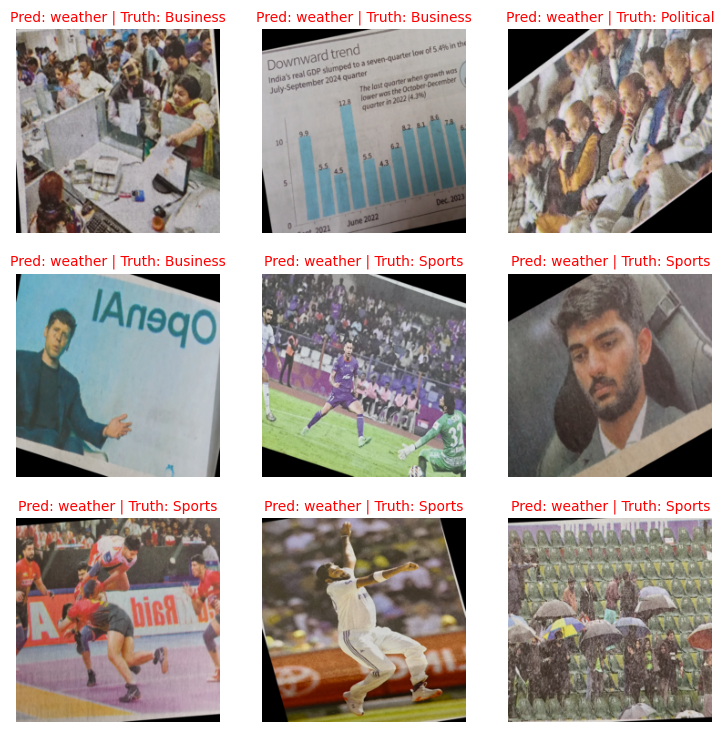

In [52]:
plt.figure(figsize=(9,9))
nrows=3
ncols=3
for i,sample in enumerate(test_sample):
    plt.subplot(nrows,ncols,i+1)
    plt.imshow(sample.permute(1,2,0))
    pred_label=class_names[pred_classes[i]]
    truth_label=class_names[test_label[i]]
    title_text=f"Pred: {pred_label} | Truth: {truth_label}"
    if pred_label==truth_label:
        plt.title(title_text,fontsize=10,c="g")
    else:
        plt.title(title_text,fontsize=10,c="r")
    plt.axis(False)

In [ ]:
import streamlit as st

In [ ]:
st.title("📰 Newspaper Image Theme Classifier")
st.write("Upload an image, and the model will predict its category.")

uploaded_file = st.file_uploader("Choose a newspaper image...", type=["jpg", "png", "jpeg"])

if uploaded_file is not None:
    image = Image.open(uploaded_file)
    st.image(image, caption="Uploaded Image", use_column_width=True)
    
    # Preprocess image
    img_tensor = transform(image).unsqueeze(0)  # Add batch dimension
    
    # Make prediction
    with torch.no_grad():
        output = model(img_tensor)
        predicted_class = torch.argmax(output, dim=1).item()
        predicted_label = CLASS_NAMES[predicted_class]
    
    # Display result
    st.success(f"Prediction: **{predicted_label}**")